Proposito inicial: Analisis exploratorio de los datos de industrias candidatos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data_FINAL_all.csv')
df = df.drop(columns=['Unnamed: 0','SCORE'])


In [3]:
df

,Factibilidad,Global_Market_norm,Opc_futuras,Regional Comp,country,y_t3,year
0,0.632653,0.510040,0.522088,0.071429,AUS,0.0,1999
1,0.734694,0.457831,0.417671,0.142857,AUS,0.0,1999
2,0.987755,0.690763,0.208835,0.214286,AUS,0.0,1999
3,0.689796,0.983936,0.570281,0.214286,AUS,0.0,1999
4,0.134694,0.923695,0.763052,0.071429,AUS,1.0,1999
...,...,...,...,...,...,...,...
565059,0.008242,0.290761,1.000000,0.000000,ZMB,0.0,2018
565060,0.090659,0.519022,0.959239,0.000000,ZMB,0.0,2018
565061,0.167582,0.692935,0.910326,0.125000,ZMB,0.0,2018
565062,0.277473,0.442935,0.741848,0.187500,ZMB,1.0,2018


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565064 entries, 0 to 565063
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Factibilidad        565064 non-null  float64
 1   Global_Market_norm  565064 non-null  float64
 2   Opc_futuras         565064 non-null  float64
 3   Regional Comp       565064 non-null  float64
 4   country             565064 non-null  object 
 5   y_t3                565064 non-null  float64
 6   year                565064 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 30.2+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Factibilidad,565064.0,0.500000,0.292260,0.000000,0.246862,0.500000,0.753138,1.0
Global_Market_norm,565064.0,0.507162,0.288223,0.006313,0.257627,0.507225,0.756766,1.0
Opc_futuras,565064.0,0.501739,0.292205,0.000000,0.249097,0.502554,0.755014,1.0
Regional Comp,565064.0,0.192191,0.160739,0.000000,0.064516,0.170732,0.279070,1.0
y_t3,565064.0,0.077628,0.267586,0.000000,0.000000,0.000000,0.000000,1.0
year,565064.0,2009.043680,5.622700,1999.000000,2004.000000,2009.000000,2014.000000,2018.0


In [ ]:

y_counts = df["y_t3"].value_counts().rename(index={0: "no_entrada", 1: "entrada"})
y_prop = df["y_t3"].value_counts(normalize=True)

print("Conteos:")
print(y_counts)
print("\nProporciones:")
print(y_prop)


Conteos:
y_t3
no_entrada    521199
entrada        43865
Name: count, dtype: int64

Proporciones:
y_t3
0.0    0.922372
1.0    0.077628
Name: proportion, dtype: float64


In [ ]:

entry_by_year = (
    df.groupby("year")["y_t3"]
      .agg(["mean", "count"])
      .rename(columns={"mean": "entry_rate", "count": "n_obs"})
      .reset_index()
)
entry_by_year.head()


,year,entry_rate,n_obs
0,1999,0.086033,21422
1,2000,0.082561,22989
2,2001,0.082189,23300
3,2002,0.083972,23877
4,2003,0.085413,25804


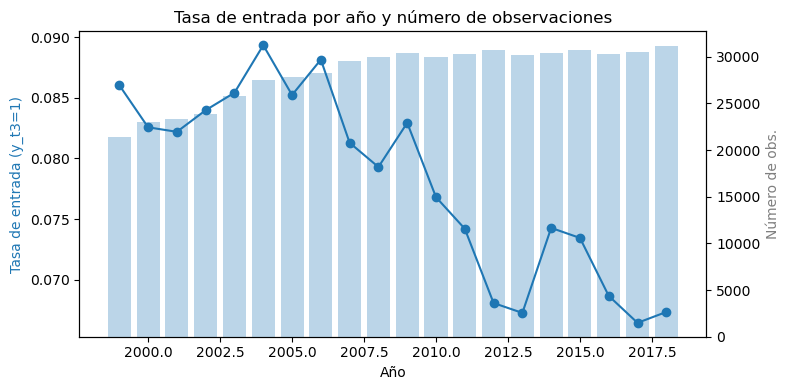

In [ ]:

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(entry_by_year["year"], entry_by_year["entry_rate"], marker="o")
ax1.set_ylabel("Tasa de entrada (y_t3=1)", color="tab:blue")
ax1.set_xlabel("Año")

ax2 = ax1.twinx()
ax2.bar(entry_by_year["year"], entry_by_year["n_obs"], alpha=0.3)
ax2.set_ylabel("Número de obs.", color="tab:gray")

ax1.set_title("Tasa de entrada por año y número de observaciones")
plt.tight_layout()
plt.show()


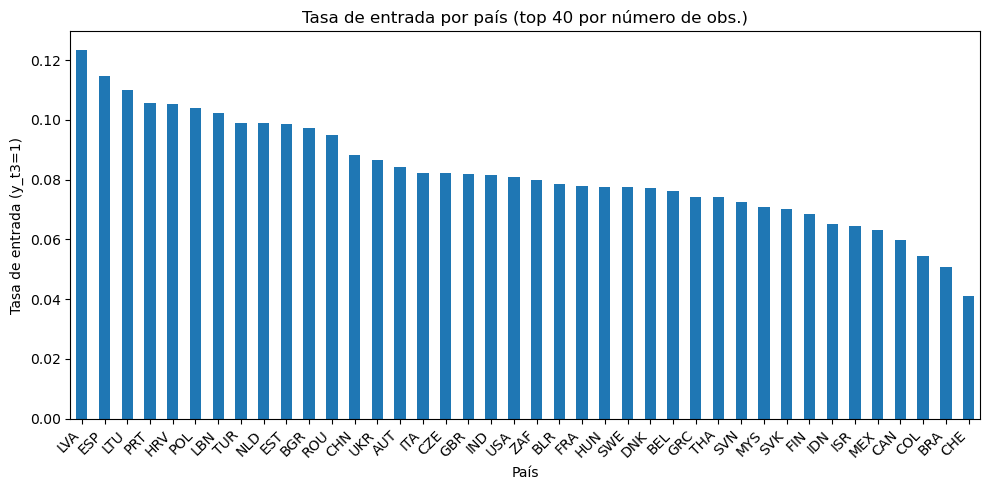

In [ ]:

entry_by_country = (
    df.groupby("country")["y_t3"]
      .agg(["mean", "count"])
      .rename(columns={"mean": "entry_rate", "count": "n_obs"})
      .reset_index()
)

top_countries = (
    entry_by_country
    .sort_values("n_obs", ascending=False)
    .head(40)  # top 20
)

fig, ax = plt.subplots(figsize=(10, 5))
top_countries.sort_values("entry_rate", ascending=False).plot(
    x="country", y="entry_rate", kind="bar", ax=ax
)
plt.legend().remove()
ax.set_xlabel("País")
ax.set_ylabel("Tasa de entrada (y_t3=1)")
ax.set_title("Tasa de entrada por país (top 40 por número de obs.)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:

metricas = ["Factibilidad", "Global_Market_norm", "Opc_futuras", "Regional Comp"]

df.groupby("y_t3")[metricas].describe().T


y_t3                                0.0           1.0
Factibilidad       count  521199.000000  43865.000000
                   mean        0.492635      0.587505
                   std         0.291943      0.281622
                   min         0.000000      0.000000
                   25%         0.239057      0.366856
                   50%         0.489270      0.622257
                   75%         0.744413      0.832031
                   max         1.000000      1.000000
Global_Market_norm count  521199.000000  43865.000000
                   mean        0.501263      0.577263
                   std         0.288002      0.281529
                   min         0.006313      0.006410
                   25%         0.251163      0.347887
                   50%         0.498611      0.604683
                   75%         0.750000      0.826260
                   max         1.000000      1.000000
Opc_futuras        count  521199.000000  43865.000000
                   mean        0.503105      0.485505
                   std         0.294172      0.267199
                   min         0.000000      0.000000
                   25%         0.247214      0.267857
                   50%         0.504518      0.483713
                   75%         0.759943      0.696319
                   max         1.000000      1.000000
Regional Comp      count  521199.000000  43865.000000
                   mean        0.189167      0.228110
                   std         0.160125      0.163648
                   min         0.000000      0.000000
                   25%         0.062500      0.116279
                   50%         0.166667      0.209302
                   75%         0.268293      0.317073
                   max         1.000000      1.000000

In [ ]:

df_long = df[metricas + ["y_t3"]].melt(
    id_vars="y_t3",
    var_name="metrica",
    value_name="valor"
)


df_long_sample = df_long.sample(min(50000, len(df_long)), random_state=42)


In [23]:
df_long_sample

,y_t3,metrica,valor
845186,1.0,Global_Market_norm,0.432432
50088,0.0,Factibilidad,0.465909
184627,0.0,Factibilidad,0.047684
1493035,0.0,Opc_futuras,0.134006
1964972,0.0,Regional Comp,0.414634
...,...,...,...
318578,0.0,Factibilidad,0.414226
1559285,1.0,Opc_futuras,0.691358
1205044,0.0,Opc_futuras,0.826255
1166785,0.0,Opc_futuras,0.011111


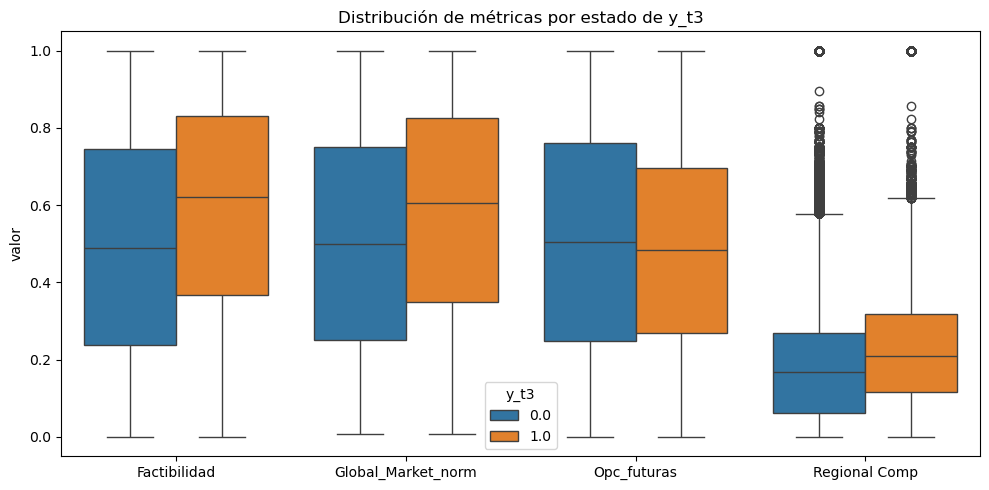

In [25]:
# Cell 13: boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(#df_long_sample
    data=df_long,
    x="metrica",
    y="valor",
    hue="y_t3"
)
plt.title("Distribución de métricas por estado de y_t3")
plt.xlabel("")
plt.legend(title="y_t3")
plt.tight_layout()
plt.show()


In [ ]:

corr_matrix = df[metricas].corr()
corr_matrix


,Factibilidad,Global_Market_norm,Opc_futuras,Regional Comp
Factibilidad,1.000000,0.202174,-0.709623,0.212167
Global_Market_norm,0.202174,1.000000,0.026852,0.118344
Opc_futuras,-0.709623,0.026852,1.000000,-0.160672
Regional Comp,0.212167,0.118344,-0.160672,1.000000


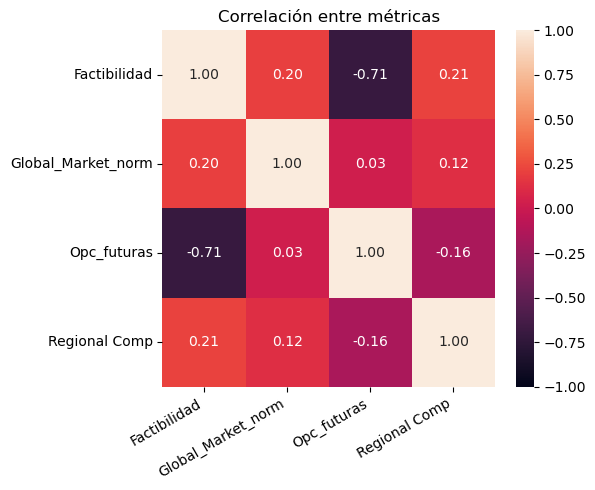

In [ ]:

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1
)
plt.title("Correlación entre métricas")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


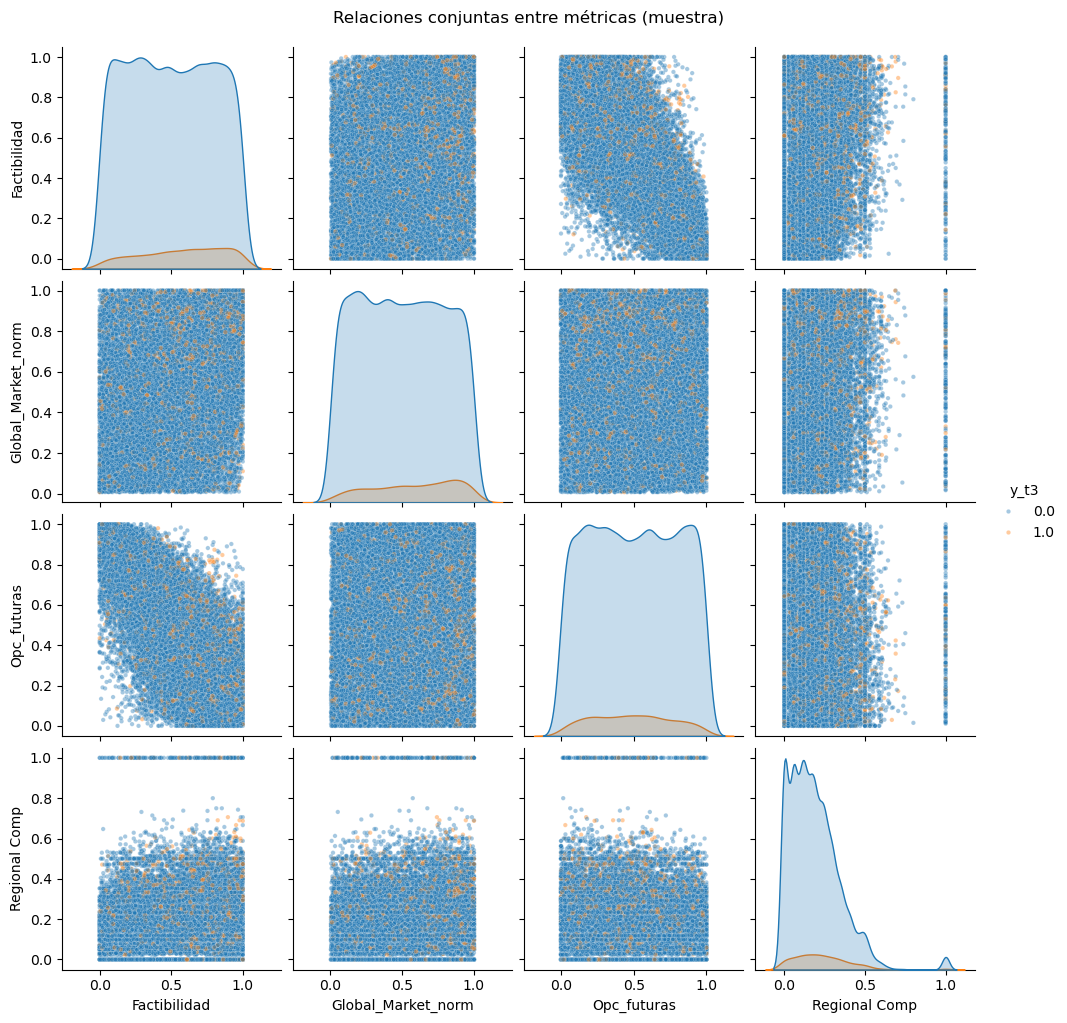

In [ ]:

sample_size = min(20000, len(df))
df_sample = df[metricas + ["y_t3"]].sample(sample_size, random_state=42)

sns.pairplot(
    df_sample,
    vars=metricas,
    hue="y_t3",
    diag_kind="kde",
    plot_kws={"alpha": 0.4, "s": 10}
)
plt.suptitle("Relaciones conjuntas entre métricas (muestra)", y=1.02)
plt.show()

In [ ]:

def tasa_entrada_por_cuartil(df, col, q=10):
    """
    Corta la métrica 'col' en q quantiles y calcula la tasa de y_t3=1 en cada bin.
    """
    tmp = df[[col, "y_t3"]].copy()
    tmp["bin"] = pd.qcut(tmp[col], q=q, duplicates="drop")
    resumen = (
        tmp.groupby("bin")["y_t3"]
           .mean()
           .reset_index()
           .rename(columns={"y_t3": "entry_rate"})
    )
    return resumen

res_fact = tasa_entrada_por_cuartil(df, "Factibilidad", q=10)
res_fact


C:\Users\bruno\AppData\Local\Temp\ipykernel_19144\3973157042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("bin")["y_t3"]


,bin,entry_rate
0,"(-0.001, 0.095]",0.042895
1,"(0.095, 0.196]",0.050208
2,"(0.196, 0.298]",0.056712
3,"(0.298, 0.399]",0.065729
4,"(0.399, 0.5]",0.074101
5,"(0.5, 0.601]",0.080795
6,"(0.601, 0.702]",0.088303
7,"(0.702, 0.804]",0.094789
8,"(0.804, 0.905]",0.103813
9,"(0.905, 1.0]",0.118947


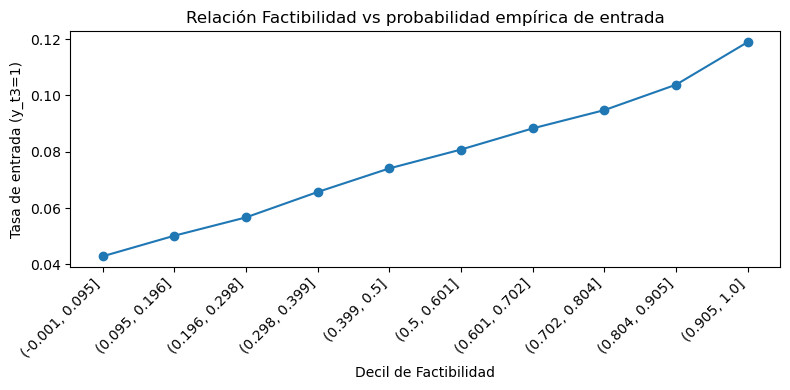

In [ ]:

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(len(res_fact)), res_fact["entry_rate"], marker="o")
ax.set_xticks(range(len(res_fact)))
ax.set_xticklabels(res_fact["bin"].astype(str), rotation=45, ha="right")
ax.set_ylabel("Tasa de entrada (y_t3=1)")
ax.set_xlabel("Decil de Factibilidad")
ax.set_title("Relación Factibilidad vs probabilidad empírica de entrada")
plt.tight_layout()
plt.show()


C:\Users\bruno\AppData\Local\Temp\ipykernel_19144\3973157042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("bin")["y_t3"]


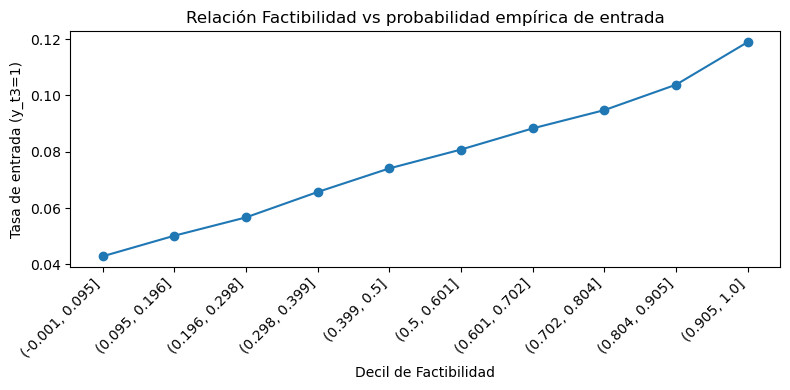

C:\Users\bruno\AppData\Local\Temp\ipykernel_19144\3973157042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("bin")["y_t3"]


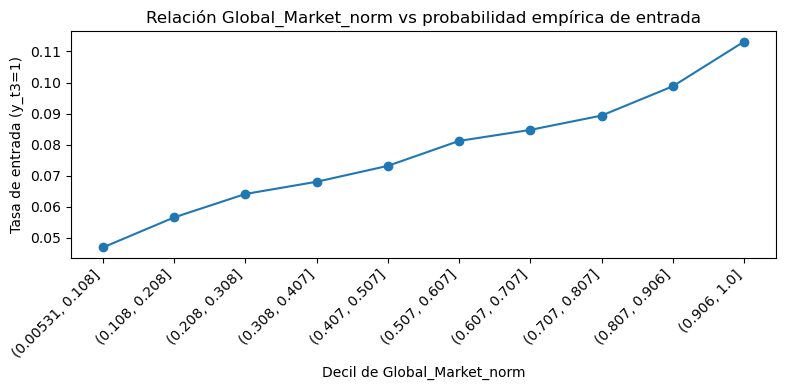

C:\Users\bruno\AppData\Local\Temp\ipykernel_19144\3973157042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("bin")["y_t3"]


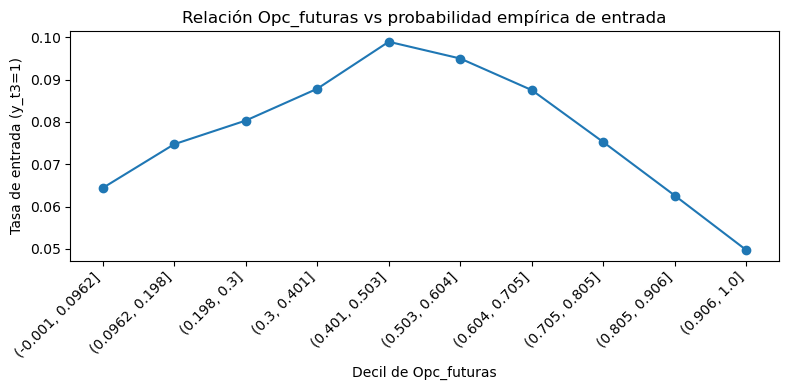

C:\Users\bruno\AppData\Local\Temp\ipykernel_19144\3973157042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("bin")["y_t3"]


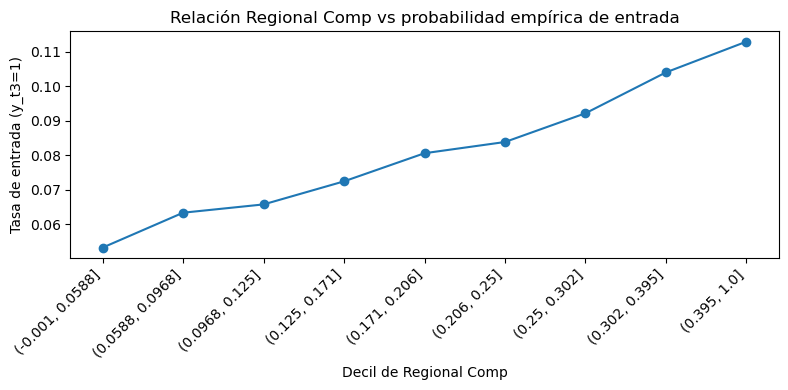

In [30]:
for col in metricas:
    res = tasa_entrada_por_cuartil(df, col, q=10)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(range(len(res)), res["entry_rate"], marker="o")
    ax.set_xticks(range(len(res)))
    ax.set_xticklabels(res["bin"].astype(str), rotation=45, ha="right")
    ax.set_ylabel("Tasa de entrada (y_t3=1)")
    ax.set_xlabel(f"Decil de {col}")
    ax.set_title(f"Relación {col} vs probabilidad empírica de entrada")
    plt.tight_layout()
    plt.show()
